# netCDF

## We are going to make an animated gif and not embarass a friend!


First we will need to install a new package called netCFD4.  WE DID THIS IN CLASS AND IT SHOULD WORK!

*  As always I googled "conda install netcd4"
*  It takes me to this site. https://anaconda.org/anaconda/netcdf4
*  Copy and paste "conda install -c anaconda netcdf4" into terminal or the prompt
*  BUT THIS FAILED FOR ME!
*  I uninstalled via "conda remove netcdf4"
*  then I pip installed "pip install netcdf4" and it worked
*  restart the kernal



In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

import netCDF4

import datetime


#On Mac's
import os
os.environ['PROJ_LIB'] = '/anaconda3/share/proj/share/proj'

from mpl_toolkits.basemap import Basemap

You are going to read in a netcdf file.  Plot sea surface temperatures.  Animate them for the year and turn in an animated GIF.  

What is a netcdf file??? Go check it out on wikipedia http://en.wikipedia.org/wiki/NetCDF

It stands for Network Common Data File

It is a data file where the header describes the file and you can get all the data out into arrays.  BUT it is in binary form to save space.  So you can't see what it is but have to read the information to learn about it.  So that is sort of weird.  It is a little like a black box (or now those Escape Room Parties). 


It is used a lot in oceanography and atmospheric sciences.  So lets learn by doing.  I always feel like I am in a fog with netcdf because I don't use them much and I can't just look at the file.  But at least lets get exposed so you could do it on your own next time.  Basically since we are looking at sea surface temperatures we will want a map as our final output.

But importantly.  Every year someone comes back and thanks me for showing them netcdf files as they looked like a champion in a meeting as they were able to handle data that confused everyone else.

The links to get the sea surface data don't always work.  Be patient.  WE DOWNLOADED THIS YESTERDAY.

* Start here http://www.esrl.noaa.gov/psd/data/gridded/data.noaa.oisst.v2.highres.html#detail
* I have to scroll up. 
* click on daily mean and the words 'select list' which are tiny and to the right.
* then click 'see list' for the Daily Mean
* then click 2014 and it will download.
* It is a 400mb file.  It might be slow if you are on wifi
* Now make sure it is saved in your working directory and we can open it.  url is he file name.  

In [4]:
url=('sst.day.mean.2019.nc')
f=netCDF4.Dataset(url)

You saved the file into "f".  So if we print f we will see part of it.  But remember the f is not the whole file but more like a function that we can then call to get at the whole file.  We will use "f." notation to learn about the file.

In [5]:
print (f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.5
    title: NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surface Temperature (OISST) Analysis, Version 2.1
    institution: NOAA/National Centers for Environmental Information
    source: NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temperature-optimum-interpolation/v2.1/access/avhrr/
    References: https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2.highres.html
    dataset_title: NOAA Daily Optimum Interpolation Sea Surface Temperature
    version: Version 2.1
    comment: Reynolds, et al.(2007) Daily High-Resolution-Blended Analyses for Sea Surface Temperature (available at https://doi.org/10.1175/2007JCLI1824.1). Banzon, et al.(2016) A long-term record of blended satellite and in situ sea-surface temperature for climate monitoring, modeling and environmental studies (available at https://doi.org/10.5194/essd-8-165-2016). Huang et al. (2020) Impr

So what do we have?  We have 365 time steps of lat and long with sea surface temperatures at every day.  so lets try to pull it out.  It is easy....

In [6]:
print (f.variables['time'])

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: Time
    units: days since 1800-01-01 00:00:00
    delta_t: 0000-00-01 00:00:00
    avg_period: 0000-00-01 00:00:00
    axis: T
    actual_range: [79988. 80352.]
unlimited dimensions: time
current shape = (365,)
filling on, default _FillValue of 9.969209968386869e+36 used


We are going to come back to the time values.  

Now lets look at latitude.  

In [7]:
print (f.variables['lat'])

<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    long_name: Latitude
    standard_name: latitude
    units: degrees_north
    actual_range: [-89.875  89.875]
    axis: Y
unlimited dimensions: 
current shape = (720,)
filling on, default _FillValue of 9.969209968386869e+36 used


There are 720 locations for latitude.  Or 4 values every degree

Now lets look at longitude

In [8]:
print (f.variables['lon'])

<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    long_name: Longitude
    standard_name: longitude
    units: degrees_east
    actual_range: [1.25000e-01 3.59875e+02]
    axis: X
unlimited dimensions: 
current shape = (1440,)
filling on, default _FillValue of 9.969209968386869e+36 used


longitude has 1440 values or twice as many as latitude as it goes around the whole globe

Now we can look at the actual sea surface temperature.

In [9]:
print (f.variables['sst'])

<class 'netCDF4._netCDF4.Variable'>
float32 sst(time, lat, lon)
    long_name: Daily Sea Surface Temperature
    units: degC
    valid_range: [-3. 45.]
    missing_value: -9.96921e+36
    precision: 2.0
    dataset: NOAA High-resolution Blended Analysis
    var_desc: Sea Surface Temperature
    level_desc: Surface
    statistic: Mean
    parent_stat: Individual Observations
    actual_range: [-1.8  36.79]
unlimited dimensions: time
current shape = (365, 720, 1440)
filling on, default _FillValue of 9.969209968386869e+36 used


The sst is really cool.  Think of it as 365 days of data, each in an array of values in the shape of 720 by 1440.  So for each day we will have a map of sea surface temperatures.

Can we actually look at some numbers?   Remove the comment as I put it in to save space when printing.  

In [10]:
 f.variables['lat'][:]

masked_array(data=[-89.875, -89.625, -89.375, -89.125, -88.875, -88.625,
                   -88.375, -88.125, -87.875, -87.625, -87.375, -87.125,
                   -86.875, -86.625, -86.375, -86.125, -85.875, -85.625,
                   -85.375, -85.125, -84.875, -84.625, -84.375, -84.125,
                   -83.875, -83.625, -83.375, -83.125, -82.875, -82.625,
                   -82.375, -82.125, -81.875, -81.625, -81.375, -81.125,
                   -80.875, -80.625, -80.375, -80.125, -79.875, -79.625,
                   -79.375, -79.125, -78.875, -78.625, -78.375, -78.125,
                   -77.875, -77.625, -77.375, -77.125, -76.875, -76.625,
                   -76.375, -76.125, -75.875, -75.625, -75.375, -75.125,
                   -74.875, -74.625, -74.375, -74.125, -73.875, -73.625,
                   -73.375, -73.125, -72.875, -72.625, -72.375, -72.125,
                   -71.875, -71.625, -71.375, -71.125, -70.875, -70.625,
                   -70.375, -70.125, -69.875, -69.6

So we can pull out numbers and look at them.  They all come out in numpy arrays.  

In [11]:
type(f.variables['lat'][:])

numpy.ma.core.MaskedArray

But we can pull them out and set them to a variable. We are not going to use Pandas and just leave everything in numpy arrays for today.  This might take a minute because you are putting 400 Mb of data into memory.  Your computer might get cranky and we might have to restart at some point.

In [12]:
lon=f.variables['lon'][:]
lat=f.variables['lat'][:]
sst=f.variables['sst'][:]
time=f.variables['time'][:]

You can look at the shape of each element.  Remember 1 year has 365 days!

In [13]:
np.shape(time)

(365,)

In [14]:
np.shape(lon)

(1440,)

In [15]:
np.shape(lat)

(720,)

In [16]:
np.shape(sst)

(365, 720, 1440)

So what do we have?  We have a lat/lon grid.  Then each point has a sst.  Then we have that repeated 365 times for each day of the year.  

Do you remember the easy way we plotted the Brian! Array? Well lets use that to look at one slice of the sst.   

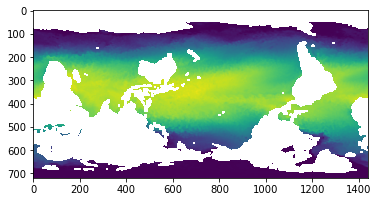

In [17]:
fig,ax=plt.subplots()
ax.imshow(sst[0])

What just happened?  This did not make a map?  It just took the sst array and plotted it.  Each array point has a latittude and longitude we could use to make a map.  But we didn't do that.  We just did a raw imshow which shows the array.  It is a nice start.   Read the help and see if you can flip the array? 

In [18]:
?plt.imshow

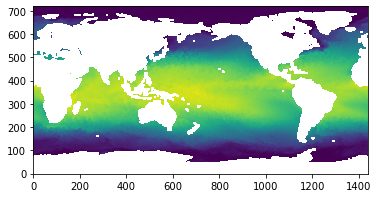

In [19]:
fig,ax=plt.subplots()
ax.imshow(sst[0],origin='lower')

imshow is nice as a quick way to show an array but it is not a map.  The next way to make a better map is pcolormesh.  It uses the lat and long so it is better but still not a map.  

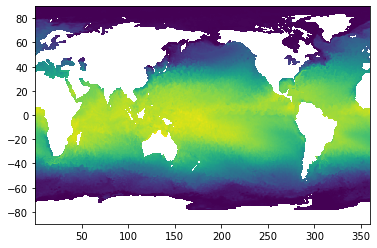

In [20]:
fig,ax=plt.subplots()
ax.pcolormesh(lon,lat,sst[0])

Lets try to make that nicer

* I am going to set the vmin and vmax
* change the colormap to one that is better for temperature called jet.

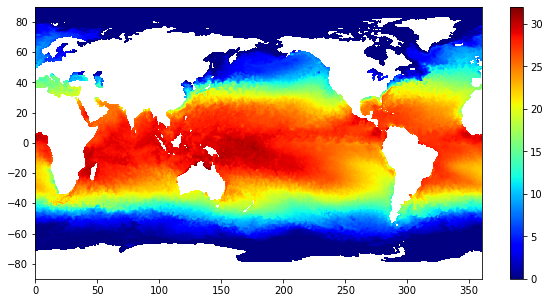

In [21]:
fig,ax=plt.subplots()
fig.set_size_inches(10,5)
colormap = plt.cm.jet
im=ax.pcolormesh(lon,lat,sst[0],vmax=32,vmin=0,cmap=colormap)
ax.set_xlim([0,360])
ax.set_ylim([-90,90])
cbar=fig.colorbar(im)

Now make a variable called "day" and set it equal to the day you want to plot.  For example January 31 will be 30 because python starts at 0.  Compare day 0 and day 180.  Do the temperatures look different?  

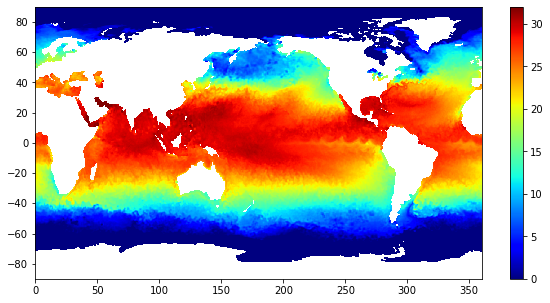

In [24]:
day=180

fig,ax=plt.subplots()
fig.set_size_inches(10,5)
colormap = plt.cm.jet
im=ax.pcolormesh(lon,lat,sst[day],vmax=32,vmin=0,cmap=colormap)
ax.set_xlim([0,360])
ax.set_ylim([-90,90])
cbar=fig.colorbar(im)

Now that is still not a proper map but it is a quick way to plot a lot of data.  

We never had a day to learn basemap.  So I am going to show you "quickly" and will add a lot of notes.  It is not that different and we are only doing one thing. But look at how good the map looks! 

But we did basemap last week.  We can use what we did last week and make a better map.  
* We can use basemap and choose a projection.  I chose kav7
* we can draw something for the continents.  I tried blue marble and it didn't look great so i added coastlines and countries.
* I added meridians and parallels.
* I put the colorbar on the bottom as I like it there and I added a title to it
* I also saved the fig and made the size small as we will need that later also.  dpi sets the resolution

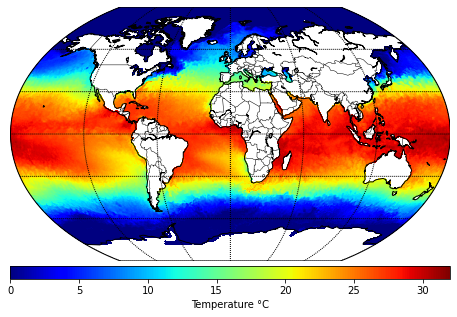

In [28]:
fig,ax=plt.subplots()
fig.set_size_inches(10,5)  #turn on your graph like normal

m = Basemap(projection='kav7',lon_0=0,ax=ax)  #now take your axes and give them a projection!
lon_pc, lat_pc = np.meshgrid(lon,lat)  #This now makes the lat and lon work for plotting.  

colormap = plt.cm.jet  #choose your colors like we did the other week!

m.drawcoastlines()  # this is a built in function that draws parts of the map!
m.drawcountries()

im=m.pcolormesh(lon_pc,lat_pc,sst[0],vmax=32,vmin=0,cmap=colormap,latlon=True)  # draw the map.

m.drawparallels(np.arange(-90.,99.,30.))  #draw the lat/longs
m.drawmeridians(np.arange(-180.,180.,60.))

cbar=m.colorbar(im,'bottom')  #add the color bar and its title
cbar.set_label(u'Temperature \N{DEGREE SIGN}C')

fig.savefig('FirstTrySST.png',dpi=50)  # save it but make it a small resolution for later when we make the movie

That is a good looking map!!!!

Now go back above and change the sst[0] calls to another number as this represents the day of the year.  Can you see a change???


I am starting to see a path forward for how to make a movie of the temperatures over the year.  Python is not perfect for making movies.  We are going to make a modern flip book.  We will save an image for each frame and then we can use python or a web program to put them together.  It is like turning a burst on your phone into a movie.  We want to end with an aniamted GIF with python or a program.  Things we will need to be able to do.
* Loop over all the data.
* Figure out the date for the data.
* plot the data.
* save the data in a unique file for each day
* use python/website to put it all togehter.  

So we need to learn each of these steps.  I will start with figuring out the date for each slice.  

In [37]:
print (f.variables['time'])

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: Time
    units: days since 1800-01-01 00:00:00
    delta_t: 0000-00-01 00:00:00
    avg_period: 0000-00-01 00:00:00
    axis: T
    actual_range: [79988. 80352.]
unlimited dimensions: time
current shape = (365,)
filling on, default _FillValue of 9.969209968386869e+36 used


What does this mean?????  Time since 1800.  Holy crazy.  Lets look.  I commented it out to save space

In [27]:
#print (time)

In [41]:
79988/365.0

219.14520547945204

That makes sense.  It has been 219 years since 1800.  But how do we use it???

Luckily Python has a datetime module!!!  We have been using it in Pandas w/o you realizing it.  https://docs.python.org/2/library/datetime.html

Plus I had you import it above!   so type datetime. and hit tab and see what we got!

In [44]:
datetime.

In [44]:
datetime.datetime(

datetime.datetime

So lets add the year,month,day and see what happens

In [28]:
datetime.datetime(2015,4,10)

datetime.datetime(2015, 4, 10, 0, 0)

In [31]:
today=datetime.datetime(2020,10,14)
print (today)
type(today)

2020-10-14 00:00:00


datetime.datetime

So we can make ourselves a datetime!  plus datetime has a function called timedelta....

In [32]:
?datetime.timedelta

Now go back to https://docs.python.org/2/library/datetime.html and scroll down to the table.  

It says we can do

Date2=startdate+timedelta

date1=1800-01-01

timedelta=78526 days

Lets try it!

In [33]:
startdate=datetime.datetime(1800,1,1)
print (startdate)

1800-01-01 00:00:00


remember delta signifies change

In [45]:
datedelta=datetime.timedelta(days=79988)
print (datedelta)

79988 days, 0:00:00


In [46]:
type(datedelta)

datetime.timedelta

In [47]:
print (startdate+datedelta)

2019-01-01 00:00:00


We could print the date nicely using format notation

In [49]:
print ("The first date is {:%b %d, %Y}".format(startdate+datedelta))

The first date is Jan 01, 2019


Here is a summary https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior

Awesome!!! The number I chose is the first day of 2019!!! It worked!!! Now we could make a loop that goes over the time arrray and prints the date of each day.  

In [50]:
startdate=datetime.datetime(1800,1,1)
for t in time:
    date=datetime.timedelta(days=t)+startdate
    print ("The date is {:%b %d, %Y}".format(date))

The date is Jan 01, 2019
The date is Jan 02, 2019
The date is Jan 03, 2019
The date is Jan 04, 2019
The date is Jan 05, 2019
The date is Jan 06, 2019
The date is Jan 07, 2019
The date is Jan 08, 2019
The date is Jan 09, 2019
The date is Jan 10, 2019
The date is Jan 11, 2019
The date is Jan 12, 2019
The date is Jan 13, 2019
The date is Jan 14, 2019
The date is Jan 15, 2019
The date is Jan 16, 2019
The date is Jan 17, 2019
The date is Jan 18, 2019
The date is Jan 19, 2019
The date is Jan 20, 2019
The date is Jan 21, 2019
The date is Jan 22, 2019
The date is Jan 23, 2019
The date is Jan 24, 2019
The date is Jan 25, 2019
The date is Jan 26, 2019
The date is Jan 27, 2019
The date is Jan 28, 2019
The date is Jan 29, 2019
The date is Jan 30, 2019
The date is Jan 31, 2019
The date is Feb 01, 2019
The date is Feb 02, 2019
The date is Feb 03, 2019
The date is Feb 04, 2019
The date is Feb 05, 2019
The date is Feb 06, 2019
The date is Feb 07, 2019
The date is Feb 08, 2019
The date is Feb 09, 2019


Next let's add enumerate so we know what day of the year it is. 

In [51]:
startdate=datetime.datetime(1800,1,1)
for day,t in enumerate(time):
    date=datetime.timedelta(days=t)+startdate
    print ("The date is {:%b %d, %Y} and it is the {} day of year".format(date,day))

The date is Jan 01, 2019 and it is the 0 day of year
The date is Jan 02, 2019 and it is the 1 day of year
The date is Jan 03, 2019 and it is the 2 day of year
The date is Jan 04, 2019 and it is the 3 day of year
The date is Jan 05, 2019 and it is the 4 day of year
The date is Jan 06, 2019 and it is the 5 day of year
The date is Jan 07, 2019 and it is the 6 day of year
The date is Jan 08, 2019 and it is the 7 day of year
The date is Jan 09, 2019 and it is the 8 day of year
The date is Jan 10, 2019 and it is the 9 day of year
The date is Jan 11, 2019 and it is the 10 day of year
The date is Jan 12, 2019 and it is the 11 day of year
The date is Jan 13, 2019 and it is the 12 day of year
The date is Jan 14, 2019 and it is the 13 day of year
The date is Jan 15, 2019 and it is the 14 day of year
The date is Jan 16, 2019 and it is the 15 day of year
The date is Jan 17, 2019 and it is the 16 day of year
The date is Jan 18, 2019 and it is the 17 day of year
The date is Jan 19, 2019 and it is the

Next we need a file name.  We will want our files nicely oraganized.  We could use the dates to name the files but I think using a number to name them may be better.  The first step is formatting our number to have 3 digits at all times.

Also, computers are funny for how they list things.  So we need to pad the numbers and make them 001, 002, 003, etc.  So we can use format and we can pad the integers.  Do you remember this from one of the first classes?  If not here is a stackoverflow link https://stackoverflow.com/questions/339007/nicest-way-to-pad-zeroes-to-string

In [54]:
startdate=datetime.datetime(1800,1,1)
for day,t in enumerate(time):
    date=datetime.timedelta(days=t)+startdate
    print ("The date is {:%b %d, %Y} and it is the {:03d} day of year".format(date,day))

The date is Jan 01, 2019 and it is the 000 day of year
The date is Jan 02, 2019 and it is the 001 day of year
The date is Jan 03, 2019 and it is the 002 day of year
The date is Jan 04, 2019 and it is the 003 day of year
The date is Jan 05, 2019 and it is the 004 day of year
The date is Jan 06, 2019 and it is the 005 day of year
The date is Jan 07, 2019 and it is the 006 day of year
The date is Jan 08, 2019 and it is the 007 day of year
The date is Jan 09, 2019 and it is the 008 day of year
The date is Jan 10, 2019 and it is the 009 day of year
The date is Jan 11, 2019 and it is the 010 day of year
The date is Jan 12, 2019 and it is the 011 day of year
The date is Jan 13, 2019 and it is the 012 day of year
The date is Jan 14, 2019 and it is the 013 day of year
The date is Jan 15, 2019 and it is the 014 day of year
The date is Jan 16, 2019 and it is the 015 day of year
The date is Jan 17, 2019 and it is the 016 day of year
The date is Jan 18, 2019 and it is the 017 day of year
The date i

Now lets make a file name with a png on it so we will be able to save our files.  
  

In [56]:
startdate=datetime.datetime(1800,1,1)
for day,t in enumerate(time):
    date=datetime.timedelta(days=t)+startdate
    filename="sst_{:03d}.png".format(day)
    print ("The date is {:%b %d, %Y}".format(date))
    print(filename)

The date is Jan 01, 2019
sst_000.png
The date is Jan 02, 2019
sst_001.png
The date is Jan 03, 2019
sst_002.png
The date is Jan 04, 2019
sst_003.png
The date is Jan 05, 2019
sst_004.png
The date is Jan 06, 2019
sst_005.png
The date is Jan 07, 2019
sst_006.png
The date is Jan 08, 2019
sst_007.png
The date is Jan 09, 2019
sst_008.png
The date is Jan 10, 2019
sst_009.png
The date is Jan 11, 2019
sst_010.png
The date is Jan 12, 2019
sst_011.png
The date is Jan 13, 2019
sst_012.png
The date is Jan 14, 2019
sst_013.png
The date is Jan 15, 2019
sst_014.png
The date is Jan 16, 2019
sst_015.png
The date is Jan 17, 2019
sst_016.png
The date is Jan 18, 2019
sst_017.png
The date is Jan 19, 2019
sst_018.png
The date is Jan 20, 2019
sst_019.png
The date is Jan 21, 2019
sst_020.png
The date is Jan 22, 2019
sst_021.png
The date is Jan 23, 2019
sst_022.png
The date is Jan 24, 2019
sst_023.png
The date is Jan 25, 2019
sst_024.png
The date is Jan 26, 2019
sst_025.png
The date is Jan 27, 2019
sst_026.png
T

But I will want to put the files into a subfolder.  So if you make a folder named sst/ we could add the prefix to the name.

In [57]:
startdate=datetime.datetime(1800,1,1)
for day,t in enumerate(time):
    date=datetime.timedelta(days=t)+startdate
    filename="sst/sst_{:03d}.png".format(day)
    print ("The date is {:%b %d, %Y}".format(date))
    print(filename)

The date is Jan 01, 2019
sst/sst_000.png
The date is Jan 02, 2019
sst/sst_001.png
The date is Jan 03, 2019
sst/sst_002.png
The date is Jan 04, 2019
sst/sst_003.png
The date is Jan 05, 2019
sst/sst_004.png
The date is Jan 06, 2019
sst/sst_005.png
The date is Jan 07, 2019
sst/sst_006.png
The date is Jan 08, 2019
sst/sst_007.png
The date is Jan 09, 2019
sst/sst_008.png
The date is Jan 10, 2019
sst/sst_009.png
The date is Jan 11, 2019
sst/sst_010.png
The date is Jan 12, 2019
sst/sst_011.png
The date is Jan 13, 2019
sst/sst_012.png
The date is Jan 14, 2019
sst/sst_013.png
The date is Jan 15, 2019
sst/sst_014.png
The date is Jan 16, 2019
sst/sst_015.png
The date is Jan 17, 2019
sst/sst_016.png
The date is Jan 18, 2019
sst/sst_017.png
The date is Jan 19, 2019
sst/sst_018.png
The date is Jan 20, 2019
sst/sst_019.png
The date is Jan 21, 2019
sst/sst_020.png
The date is Jan 22, 2019
sst/sst_021.png
The date is Jan 23, 2019
sst/sst_022.png
The date is Jan 24, 2019
sst/sst_023.png
The date is Jan 

Now we know how to
* Make a title name with the date.
* make a file name
* loop over the array

But before you begin you need to think a little.  

Each timestep we are going to make a figure, make a map, and save it.  

But making a figure and map are "expensive" and eat up cpu.  And you need to this 365 times.  So when you loop you want to set as many things before your loop as possible.  Then you can use ax.cla() to clear the axes.  If you don't clear the axis you keep putting each day over the last day and you computer will grind to a halt.  So i would test things by running just a few days.  You can do this by only calling the first so many parts of the array.  Your for loop might look like

for day,t in enumerate(time[:30]):


The websites for making a gif are full or viruses.  I would use python.  

I found this stackoverflow example.  

https://stackoverflow.com/questions/41228209/making-gif-from-images-using-imageio-in-python

Look at the answer and just update with your directories!

BUT THERE IS A BIG PROBLEM!  If you look up os.listdir It says the order of files is arbitrary.  On some computers is works and on some it doesn't and it jumbles the order.

We have two solutions.
1.  Kai came up with a great one about reading the files in (See below)



2.  I tryed to understand what wen wrong and it looks like we can sort our files.  So I googled this "python listdir in order".  It then restated that listserv jumbles the order.  But it says you can add the sorted function to the for loop.  See below!






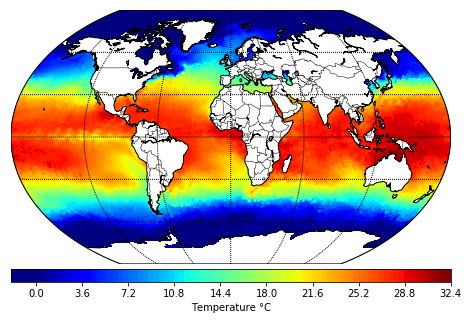

In [42]:
fig,ax=plt.subplots()
fig.set_size_inches(10,5)
m = Basemap(projection='kav7',lon_0=0,ax=ax)
lon_pc, lat_pc = np.meshgrid(lon,lat)
colormap = plt.cm.jet
m.drawcoastlines()
m.drawcountries()
im=m.contourf(lon_pc,lat_pc,sst[0],100,vmax=32,vmin=0,cmap=colormap,latlon=True)
m.drawparallels(np.arange(-90.,99.,30.))
m.drawmeridians(np.arange(-180.,180.,60.))
cbar=m.colorbar(im,'bottom')
cbar.set_label(u'Temperature \N{DEGREE SIGN}C')
fig.savefig('FirstTrySST.png',dpi=50)

In [58]:
import imageio
import os

In [ ]:
### option 1.  

images = []
for i in range(0,364):
    filename='sst/sst{:03d}.png'.format(i)
    images.append(imageio.imread(filename))
    
imageio.mimsave('sst/omg_movie2.gif', images)


In [ ]:
### option 2
png_dir = 'sst/'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
        
imageio.mimsave('sst/omg_movie2.gif', images)

## For the second part of the homework.  Here is the readin and mapping

In [59]:
# read in teh file for sst.
url=('icec.day.mean.2016.v2.nc')
f=netCDF4.Dataset(url)

# take out the data we need
lon=f.variables['lon'][:]
lat=f.variables['lat'][:]
sst=f.variables['icec'][:]
time=f.variables['time'][:]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


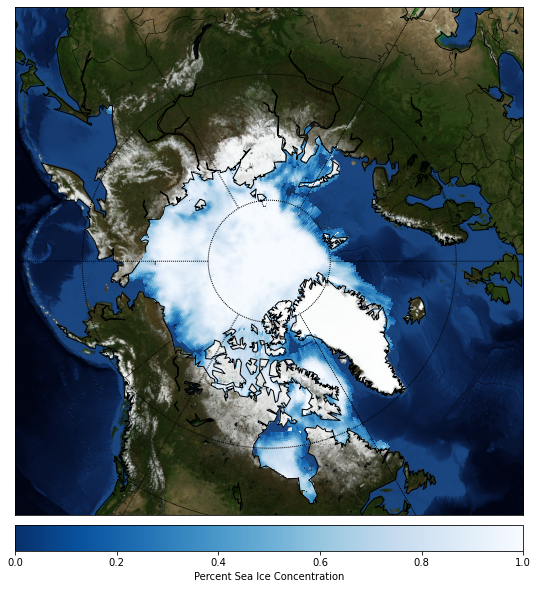

In [65]:
fig,ax=plt.subplots()
fig.set_size_inches(10,10)

m = Basemap(projection='npstere',boundinglat=50,lon_0=270,ax=ax)
lon_pc, lat_pc = np.meshgrid(lon,lat)
colormap = plt.cm.Blues_r  #online people seem to like this color map. google sea ice map and look at images

m.drawcoastlines()
m.drawcountries()
m.bluemarble()

im=m.pcolormesh(lon_pc,lat_pc,sst[180],vmax=1,vmin=0,cmap=colormap,latlon=True)
m.drawparallels(np.arange(-90.,99.,30.))
m.drawmeridians(np.arange(-180.,180.,60.))

cbar=m.colorbar(im,'bottom')
cbar.set_label(u'Percent Sea Ice Concentration')